***import library***

In [4]:
import pandas as pd

df = pd.read_xml('../data/kompas-beritaPart1.xml')
df.head()


,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


Mencari Informasi Data 
Metode .info() memberikan ringkasan singkat tentang DataFram.
dan menampilkan informasi berikut: 
1) Jumlah baris dan kolom 
2) Nama-nama kolom. 
3) Jumlah data non-null (data yang tidak kosong) per kolom. 
4) Tipe data (Dtype) dari setiap kolom.

***Memeriksa nilai NaN dan Duplikat***

In [6]:
df.isnull().sum()

sumber        0
tanggal       0
kategori      0
judul         0
isi           0
link          0
jumlahkata    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

memriksa data duplicate

***Data preparation / Daata cleaning***

***1.case folding (mengubah huruf kapital memjadi huruf kecil***

In [8]:
def caseFolding(text):
    text = text.lower()
    return text


contoh = "Terima Kasih, kak! kamu sangat Baik sekali kepadaku hari ini."
print(f'original: {contoh}')
print(f'case folded: {caseFolding(contoh)}')

original: Terima Kasih, kak! kamu sangat Baik sekali kepadaku hari ini.
case folded: terima kasih, kak! kamu sangat baik sekali kepadaku hari ini.


***2.Punctuational Removal(menghapus tanda baca)***

In [9]:
import re

def punctuationRemoval(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

contoh = "Terima Kasih, kak! kamu sangat Baik sekali kepadaku hari ini."
print(f'original : {contoh}')
print(f'punctuation removed: {punctuationRemoval(contoh)}')

    

original : Terima Kasih, kak! kamu sangat Baik sekali kepadaku hari ini.
punctuation removed: Terima Kasih kak kamu sangat Baik sekali kepadaku hari ini


***3.Menerapkan Function***


In [10]:
df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuationRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


***4.Tokenisasi(proses memecah teks/kalimat/kata menjadi potongan-potongan kecil yang disebut token)***

In [11]:
def tokenize(text):
    return text.split(" ")

contoh = "Terima Kasih, kak! kamu sangat Baik sekali kepadaku hari ini."
print(f'original : {contoh}')
clean = caseFolding(contoh)
clean = punctuationRemoval(clean)
print(f'tokenized: {tokenize(clean)}')

original : Terima Kasih, kak! kamu sangat Baik sekali kepadaku hari ini.
tokenized: ['terima', 'kasih', 'kak', 'kamu', 'sangat', 'baik', 'sekali', 'kepadaku', 'hari', 'ini']


***4.1 embuat function tokenisasi***



Dalam tokenisasi ini menggunakan method split yang merupakan original dari python untuk 
dilakukan pemisahan perkata dengan spasi sebagai acuannya.

In [12]:
df['tokens'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, , ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, , sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, , resmi, diperkenalkan, p..."


***4.2menerapkan Tokenisasi***

Bila function yang di buat sudah bekerja dengan baik, selanjutnya menerapkan ke dalam dataframe. 
Kolom clean yang sudah dilakukan pembersihan digunakan untuk tokenisasi lalu hasilnya disimpan 
ke dalam kolom yang baru di buat yaitu tokens yang berisi list kata-kata. 

***5.Frekuensi kata***

In [13]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
    for token in tokens:
        all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
print(term_freq_df_sorted.head())


     term  freq
133  yang  6450
10     di  5824
126   dan  4915
2          4264
35    ini  2744


Untuk menghitung kata diperlukan library collections dan function Counter untuk menghitungnya. 
Sebelum itu diperlu menggabungkan semua kata dari seluruh dokumen (all_tokens), lalu 
menggunakan dilanjutkan function Counter untuk menghitung frekuensi kemunculan setiap kata 
unik (term_freq), dan akhirnya menampilkan hasilnya dalam bentuk tabel Pandas DataFrame (tf_df) 
untuk analisis Term Frequency (TF). Agar uratan dari yang terbesar ke yang terkicel paramater 
ascending dibuat false. 

***6.Rank***

In [14]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
133,yang,6450,1
10,di,5824,2
126,dan,4915,3
2,,4264,4
35,ini,2744,5


Untuk mengurutkannya berdasarkan rank, untuk menyimpan hasilnya kita buat kolom baru 
pada dataframe yaitu Rank. Lalu untuk first berfungsi bila ada jumlah frekuensi yang sama 
maka nilai rank tetap unique. 

***7.zipf law***

In [15]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['rank']
term_freq_df_sorted.head(n=100)

,term,freq,rank,k = f * r
133,yang,6450,1,1
10,di,5824,2,2
126,dan,4915,3,3
2,,4264,4,4
35,ini,2744,5,5
...,...,...,...,...
319,para,360,96,96
1112,dapat,360,97,97
10922,republikacoid,352,98,98
406,lain,350,99,99


pertama-tama menghitung nilai k = f × r untuk setiap kata (term) yang di mana f adalah 
frekuensi kemunculan kata (freq) dan r adalah peringkatnya (rank) berdasarkan urutan 
frekuensi. Operasi ini digunakan untuk menguji Hukum Zipf, yang menyatakan bahwa hasil 
perkalian antara frekuensi dan peringkat kata dalam korpus teks cenderung konstan. 

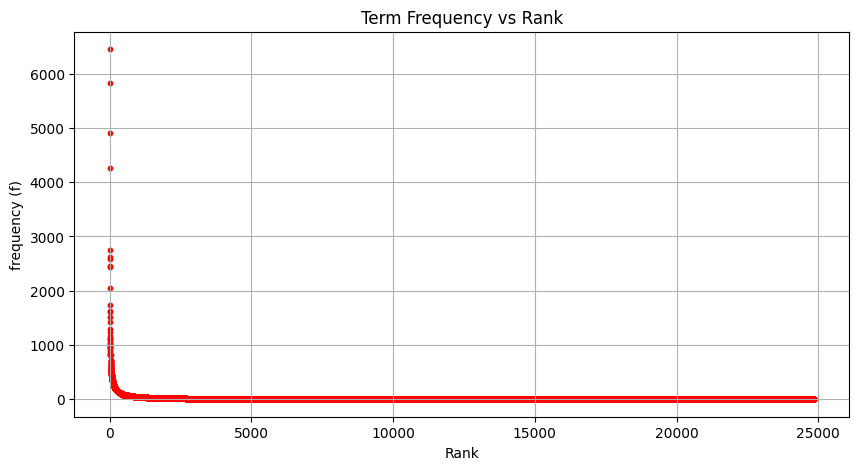

In [16]:
import matplotlib.pyplot as plt
rank = term_freq_df_sorted['rank']
freq = term_freq_df_sorted['freq']
plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title("Term Frequency vs Rank")
plt.xlabel("Rank")
plt.ylabel("frequency (f)")

plt.grid(True)
plt.show()

Grafik menunjukkan kurva yang sangat curam, di mana frekuensi kata 
turun drastis dari peringkat 1 (kata yang paling sering muncul) hingga mencapai peringkat yang 
sangat rendah. Hanya sedikit kata teratas (di sumbu r dekat nol) yang memiliki frekuensi 
kemunculan yang sangat tinggi (mencapai sekitar 6000), sementara mayoritas besar kata memiliki 
frekuensi yang sangat rendah, hampir mendekati nol.

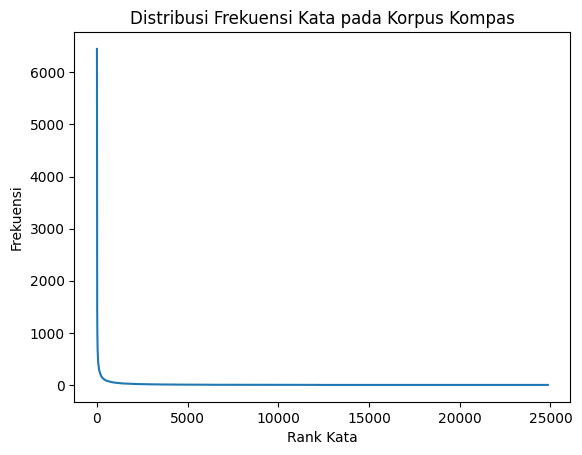

In [17]:
import matplotlib.pyplot as plt

plt.plot(term_freq_df_sorted['freq'].values)
plt.title('Distribusi Frekuensi Kata pada Korpus Kompas')
plt.xlabel('Rank Kata')
plt.ylabel('Frekuensi')
plt.show()


In [24]:
print("\n🔹 100 Kata dengan Frekuensi Terendah:")
bottom_100 = term_freq_df_sorted.tail(100)
print(bottom_10.to_string(index=False))


🔹 100 Kata dengan Frekuensi Terendah:
               term  freq  rank  k = f * r
       martinezagen     1 24757      24757
             amerer     1 24758      24758
               ning     1 24759      24759
           ngenteni     1 24760      24760
        operational     1 24761      24761
               iata     1 24762      24762
         berstandar     1 24763      24763
       mengembangan     1 24764      24764
             comply     1 24765      24765
           security     1 24766      24766
       stakeholders     1 24767      24767
            dicekal     1 24768      24768
           alfamart     1 24769      24769
           indomart     1 24770      24770
            gerbong     1 24771      24771
            jikapun     1 24772      24772
            alkohol     1 24773      24773
           persenan     1 24774      24774
                 h2     1 24775      24775
               5070     1 24776      24776
           silsilah     1 24777      24777
            say

In [23]:
print("\n🔹 100 Kata dengan Frekuensi Tertinggi:")
top_100 = term_freq_df_sorted.head(100)
print(top_10.to_string(index=False))


🔹 100 Kata dengan Frekuensi Tertinggi:
         term  freq  rank  k = f * r
         yang  6450     1          1
           di  5824     2          2
          dan  4915     3          3
               4264     4          4
          ini  2744     5          5
       dengan  2625     6          6
        untuk  2583     7          7
         dari  2460     8          8
          itu  2437     9          9
         akan  2055    10         10
        dalam  1743    11         11
         pada  1625    12         12
      pesawat  1600    13         13
        tidak  1513    14         14
           ke  1428    15         15
     tersebut  1300    16         16
         juga  1245    17         17
          tni  1174    18         18
          ada  1127    19         19
         kata  1105    20         20
        sudah  1091    21         21
        tahun  1036    22         22
      jakarta  1016    23         23
         saat   980    24         24
         bisa   966    25         2

In [20]:
weird_words = term_freq_df_sorted[
    (term_freq_df_sorted['term'].str.len() <= 2) |           # kata terlalu pendek
    (term_freq_df_sorted['term'].str.contains(r'\d')) |      # mengandung angka
    (term_freq_df_sorted['term'].str.contains(r'http')) |    # url
    (term_freq_df_sorted['term'].str.contains(r'www')) | 
    (term_freq_df_sorted['term'].str.contains(r'com')) |
    (term_freq_df_sorted['term'].str.contains(r'id'))
]

print("\n🔹 10 Kata yang dianggap janggal / aneh:")
print(weird_words.head(10).to_string(index=False))

print("\n💡 Penyebab umum kata janggal:")
print("- Belum dilakukan stopword removal (kata umum masih ikut).")
print("- Masih ada URL atau domain seperti 'kompas', 'com', 'id'.")
print("- Ada angka atau simbol sisa dari teks asli berita.")


🔹 10 Kata yang dianggap janggal / aneh:
    term  freq  rank  k = f * r
      di  5824     2          2
          4264     4          4
   tidak  1513    14         14
      ke  1428    15         15
    2015   828    30         30
      ia   609    45         45
presiden   548    52         52
       1   515    57         57
      au   403    77         77
    c130   376    87         87

💡 Penyebab umum kata janggal:
- Belum dilakukan stopword removal (kata umum masih ikut).
- Masih ada URL atau domain seperti 'kompas', 'com', 'id'.
- Ada angka atau simbol sisa dari teks asli berita.
